### Fill in group number and member names:

In [2]:
GROUP = "20"
NAME1 = "Sebastian Tufvesson"
NAME2 = "Theodor Anderberg Törngren"

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
# Optimization for learning - FRTN50

## Assignment 1

The goal of this assignment is to become familiar with some of the steps involved in solving an optimization problem. In this assignment, you will form Fenchel dual problems, find gradients and/or proximal operators, and implement the proximal gradient method.

__Problem__ The problem we will solve is the following constrained problem

\begin{align}\label{eq:the_problem}\tag{1}
	\underset{x \in S}{\text{minimize}}\; \tfrac{1}{2}x^T Q x + q^Tx
\end{align}

where $Q\in\mathbb{S}_{++}^{n}$, $q\in\mathbb{R}^{n}$ and $S\subseteq\mathbb{R}^{n}$ is a set defined by the points $a,b\in\mathbb{R}^{n}$, $a\leq b$, such that 

\begin{align*}
	S = \{x \in \mathbb{R}^{n}: a \leq x \leq b \}.
\end{align*}

I.e., we are going to minimize a quadratic function over an $n$-dimensional box. Recall that, the vector inequality $a\leq b$ means that 

\begin{align*}
	a_{i} \leq b_{i}
\end{align*}

for each $i=1,\ldots,n$. Define the function $f:\mathbb{R}^{n}\rightarrow\mathbb{R}$ such that

\begin{align*}
	f(x) = \tfrac{1}{2}x^T Q x + q^Tx
\end{align*}

for each $x\in\mathbb{R}^{n}$ and let $\iota_{S}:\mathbb{R}^{n}\rightarrow\mathbb{R}\cup\{\infty\}$ denote the indicator function of the set $S$, i.e.,

\begin{align*}
	\iota_{S}(x) =
	\begin{cases}
		0 		& \text{if }x\in S, \\
		\infty 	& \text{if }x\in \mathbb{R}^n \setminus S.
	\end{cases}
\end{align*}

Problem \eqref{eq:the_problem} can then be written as 

\begin{align}\label{eq:the_problem_mod}\tag{2}
	\underset{x \in \mathbb{R}^{n}}{\text{minimize}}\; f(x) + \iota_{S}(x).
\end{align}

__Solution method__ To solve optimization problem \eqref{eq:the_problem_mod}, we will use the _proximal gradient method_. It solves problems of the form

\begin{align}\label{eq:pgprob}\tag{3}
	\underset{x \in \mathbb{R}^{n}}{\text{minimize}}\; f(x) + g(x) 
\end{align}

where $f:\mathbb{R}^{n}\rightarrow\mathbb{R}$ is differentiable and $g:\mathbb{R}^{n}\rightarrow\mathbb{R}\cup\{\infty\}$ is proximable, i.e., $\prox_{\gamma g}$ can be cheaply computed. The proximal gradient method (with constant step-size) is given by:

- Pick some arbitrary initial guess $x^0\in\R^{n}$ and step-size $\gamma>0$.
- For $k=0,1,2\ldots$, let 
\begin{align}\label{eq:pg}\tag{4}
				x^{k+1} = \prox_{\gamma g}\left(x^k - \gamma \nabla f(x^k)\right).
\end{align}
- Stop when $x^k$ is deemed to have converged.

In this assignment, we simply run the proximal gradient method a large fixed number of iterations and plot the norm of the fixed-point residual $\norm{x^{k+1} - x^k}_{2}$ (also known as the step-length), of each step to make sure it converges to zero. Since the experiments are run on a computer, zero means smaller than machine precision, which usually is around $10^{-15}$.

The step-size parameter $\gamma$ in the \eqref{eq:pg} will affect the convergence. It should be tuned to the problem or chosen based on properties of $f$ and $g$. In particular, suppose that $f$ and $g$ are proper, closed and convex. 
If $f$ is $\beta$-smooth for some parameter $\beta>0$, the maximal step-size to guarantee convergence is $\gamma < \frac{2}{\beta}$.

Below are the tasks that you need to solve. Keep this in mind:
- The suggested exercises in the exercise compendium found on the Canvas course page, up until and including the chapter "Proximal gradient method - basics", is relevant for this assignment. 
- Carefully motivate every step in your calculations.
- Use __figures__ and __tables__ to motivate your answers.
- Figures must have appropriately labeled axes and must be referenced in the main text.
- Your code should be written in a quite general manner, i.e., if a question is slightly modified, it should only require slight modifications in your code as well. 
- Comment your code well. 
- Make sure you plot in such a way that small quantities (e.g., $\norm{x^{k+1} - x^k}_{2}$) are visible. In particular, use log-linear plots, where the quantity that should go to $0$ is on the $y$-axis using logarithmic scale, and the iteration number $k$ on the $x$-axis using linear scale.
- What you need to submit to Canvas:
    - This jupyter notebook containing your solutions.
    - An exported pdf version of the jupyter notebook. (One way to do this is to print the notebook in your web browser, and then save as pdf.)

This table shows which lectures are needed in order to solve task 1-7:
    
| Task | Lectures |
| ---- | -------- |
| 1    | 2, 3     |
| 2    | 4        |
| 3    | 3, 4     |
| 4    | 2, 4     |
| 5    | 3, 4     |
| 6    | 5        |
| 7    | 4        |

Task 8-10 can be solved after you have solved task 1-7. 

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 1:

Show that $f$ and $\iota_{S}$ in (2) are convex and show that constraint qualification (CQ) holds. You are allowed to assume that $\relint S \neq \emptyset$. Note that $f$ and $\iota_{S}$ also are closed, but you do not need to prove this.

__Solution:__ 

Since $f(x)$ is twice differentiable and $\nabla^2 f(x) = Q$ which is positive definite, as $Q \in \mathbb{S}_{++}^n$, $f$ is convex according to the second order condition.

We know that if $dom g$ is convex and the following equality holds: 

\begin{equation*}
    g(\theta x + (1 - \theta) y) \leq \theta g(x) + (1 - \theta) g(y) , \quad \forall (x, y) \in dom g, \quad \theta \in [0,1]
\end{equation*}

then $g$ is convex.

We note that $S$ is convex, since it is an intersection of hyperplanes (a polytope) and therefore convex.

Let $x, y \in S$, $\theta \in [0,1]$, which gives that $\iota_{S}(x) = 0$, and $\iota_{S}(y) = 0$, this results in:

\begin{align*}
    \iota_{S}(\theta x + (1 - \theta) y) = 0 \leq \theta \iota_{S}(x) + (1 - \theta) \iota_{S}(y) = 0 
\end{align*}

And it can be concluded that $\iota_{S}$ is convex. 

To prove that constraint qualification (CQ) holds we note that $dom f = \mathbb{R}^{n}$ and $dom \, \iota_{S} = S$. According to the definition of relative interior we have:

\begin{equation*}
    \text{relint} X = \{x \in X \; | \; \exists \epsilon > 0, \; B(x,\epsilon) \cap \text{aff} X \subseteq X\}
\end{equation*}

Since $\mathbb{R}^n$ is an affine set its relative interior equals its interior, and both $\mathbb{R}^n$ and $S$ are non-empty as $\mathbb{R}^n$ is affine as and $S$ according to assumption. 

Since $S\subseteq\mathbb{R}^{n}$ and $relint \, S \neq \emptyset$ we have that: 

\begin{align*}
    relint \, dom f \cap relint \, dom \, \iota_{S} = \mathbb{R}^{n} \cap relint \, S \neq \emptyset 
\end{align*}

Which shows that CQ holds. 



$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 2:

Compute the conjugate functions $f^\ast$ and $\iota_{S}^\ast$. The final expressions are not allowed to be given implicitly via optimization problems. E.g., projection formulas must be solved explicitly.

__Solution:__ 

First we note that $f(x)$ is differentiable for all $x \in \mathbb{R}^n$ and that $\nabla f(x) = Qx + q$. 

\begin{equation*}
    f^\ast (s) = sup_x(s^T x - f(x)) = sup_x(s^T x - \frac{1}{2}x^T Q x - q^T x) 
\end{equation*}

We use Fermat's rule to find the maximizer: 

\begin{equation*}
    0 \in \partial(s^T x - f(x)) \iff 0 = s - Qx - q \iff x = Q^{-1}(s-q)
\end{equation*}

Since Q is invertible as it is positive definite. Using this expression for $x$ gives the following expression: 

\begin{align*}
    f^\ast(s)   &  = s^T Q^{-1}(s-q) - q^T Q^{-1}(s-q) - \frac{1}{2} (s-q)^T Q^{-1}(s-q) = \\ 
                &  = \frac{1}{2} (s-q)^T Q^{-1}(s-q) \\
\end{align*}

For the indicator function $\iota_{S}$ we note that the function is separable since the set $S$ is a polytope: 

\begin{equation*}
\iota_{S}(x) = \iota_{S}(x) = \iota_{\{x \in \mathbb{R}^{n}: a \leq x \leq b \}}(x) = \sum_{i=1}^n \iota_{\{ x_i \in \mathbb{R} : a_i \leq x_i \leq b_i \}(x_i) } = \sum_{i=1}^n \iota_{[a_i, b_i]}(x_i) 
\end{equation*}

This gives the following expression for $\iota_{S}^\ast(s)$:

\begin{align*}
    \iota_{S}^\ast(s) = \sum_{i=1}^{n} \iota_{[a_i, b_i]}^{\ast}(s_i)
\end{align*}

Where the conjugate for an indicator function in one dimension is the following: 

\begin{align*}
\iota_{[a_i, b_i]}^\ast(s_i) = sup_x(s_i x_i - \iota_{[a_i, b_i]}(x_i)) = 
\left\{
    \begin {aligned}
         & a_i s_i , & s_i < 0 \\
         & 0 , & s_i = 0 \\
         & b_i s_i,  & s_i > 0 \\
    \end{aligned}
\right.
\end{align*}

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 3:

Write down a Fenchel dual problem to (2). Show that constraint qualification for the dual problem (CQ-D) holds.

_Attention/hint:_ Keep track of your minus signs.

__Solution:__ 

We restate eq. 2 here:

\begin{align*}
	\underset{x \in \mathbb{R}^{n}}{\text{minimize}}\; f(x) + \iota_{S}(x).
\end{align*}

This is equivalent to the following: 

\begin{align*}
	\underset{x \in \mathbb{R}^{n}}{\text{minimize}}\; f(Ix) + \iota_{S}(x).
\end{align*}

Which has the Fenchel Dual problem: 

\begin{align*}
	\underset{\mu \in \mathbb{R}^{n}}{\text{minimize}}\; f^\ast(\mu) + \iota_{S}^\ast(-I\mu). 
\end{align*}

Where both $f^\ast$ and $\iota_{S}^\ast$ are defined in the previous section. To show CQ for the dual problem, we note that the effective domain of both $f^\ast(\mu)$ and $\iota_{S}^\ast(-\mu)$ is $ \mathbb{R}^n $ which implies that

\begin{align*}
	relint \, (dom \, f^\ast ) \cap relint \, (dom \, \iota_{S}^\ast ) = \mathbb{R}^n \cap \mathbb{R}^n \neq \emptyset 
\end{align*}

and CQ holds for the dual problem.

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 4:

Show that $f$ and $f^*$ are $\beta$-, and $\beta^*$-smooth, respectively. Find expressions for the smallest such parameters $\beta$ and $\beta^*$.

_Hint:_ Later when calculating the smoothness parameters in Pyhton, make sure to read the documentation carefully so that you use the correct function.

__Solution:__ 

Once again we note that $f(x)$ is differentiable for all $x \in \mathbb{R}^n$ and that $\nabla f(x) = Qx + q$ and that
$f^\ast (s) = \frac{1}{2} (s-q)^T Q^{-1}(s-q)$. 

From this we find that $\nabla f^\ast (s) = Q^{-1}(s-q)$.

Recalling that a function $f(x)$ is called $\beta$-smooth if its gradient is $\beta$-Lipshitz: $||\nabla f(x) - \nabla f(y)||_2 \leq \beta ||x - y||_2$.

For $f$ we find: 

\begin{align*} 
    ||Qx + q - (Qy + q)||_2 & = ||Q(x - y)||_2 \\
                            & \leq ||Q||_2||x - y||_2 \iff \\
    ||Q||_2||x - y||_2      & \leq \beta||x - y||_2 \\
\end{align*}

From this we can determine that $\beta_{min} = ||Q||_2$. 

Similarly for $f^\ast (s)$ we find: 

\begin{align*}
    ||Q^{-1}(s_1-q) - Q^{-1}(s_2-q)||_2 & = ||Q^{-1}(s_1 - s_2)||_2 \\
                                        & \leq ||Q^{-1}||_2||s_1 - s_2||_2 \iff \\
    ||Q^{-1}||_2||s_1 - s_2||_2 & \leq \beta^*||s_1 - s_2||_2 \\ 
\end{align*}

From this we can determine that $\beta^*_{min} = ||Q^{-1}||_2$.

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
$\DeclareMathOperator*{\argmin}{argmin}$

---
### Task 5:

Compute $\nabla f$, $\nabla f^\ast$, $\prox_{\gamma\iota_{S}}$ and $\prox_{\gamma\iota_{S}^\ast}$. The final expressions are not allowed to be given implicitly via optimization problems. E.g., projection formulas must be solved explicitly.


__Solution:__ 

Computations for $\nabla f$, $\nabla f^\ast$ are found in the previous question.

For the calculations of $\prox_{\gamma\iota_{S}}$, Fermat's Rule gives that for $x = \prox_{\gamma \iota_{S}}$, the following has to hold: $0 \in \partial \iota_{S}(x) + \gamma^{-1}(x-z) $. We use the fact that $\iota_{S}(x)$ is separable to get its subdifferential:  

\begin{align*}
\partial \iota_{S}(x) = s = (s_1, ... , s_n): 
\left\{
    \begin {aligned}
         & s_i \in [-\infty, 0] , & s_i = a_i \\
         & s_i = 0 ,            & s_i \in (a_i, b_i) \\
         & s_i \in [0, \infty] ,  & s_i = b_i \\
         & \emptyset ,          & otherwise \\ 
    \end{aligned}
\right.
\end{align*}

This results in the equation: 

\begin{align*}
0 \in \partial \iota_{S}(x) + \gamma^{-1}(x-z)
\end{align*}

being separable in each dimension, as for the equation to hold, the following has to hold for each $i$: 

\begin{align*}
0 \in \partial (\iota_{S}(x))_i + \gamma^{-1}(x_i-z_i)
\end{align*}

Where the index $i$ denotes the $i$:th component in the vectors $z = (z_1, ..., z_n)$, $x = (x_1, ..., x_n)$ and $\partial \iota_{S}(x) =(s_1, ..., s_n)$. For each $i$ there are three cases where the equation holds: 

For $x_i = a_i$: 

\begin{align*}
0 \in [-\infty, 0] + \gamma^{-1}(a_i-z_i) \iff z_i \in ( \infty, a_i]
\end{align*}

For $x_i \in (a_i, b_i)$: 

\begin{align*}
0 \in 0 + \gamma^{-1}(b_i-z_i) \iff x_i = z_i
\end{align*}


For $x_i = b_i$: 

\begin{align*}
0 \in [0, \infty] + \gamma^{-1}(b_i-z_i) \iff z_i \in [b_i,  \infty)
\end{align*}

This results in the following expression for $x = \prox_{\gamma \iota_{S}}(z)$

\begin{align*}
x = \prox_{\gamma \iota_{S}}(z) = x = (x_1, ... , x_n): 
\left\{
    \begin {aligned}
         & x_i = a_i,  & z_i \leq a_i \\
         & x_i = z_i,  & z_i \in (a_i, b_i) \\
         & x_i = b_i,  & z_i \geq b_i \\
    \end{aligned}
\right.
\end{align*}

For the prox of the conjugate function $\prox_{\gamma\iota_{S}^\ast}$ we use Moreau decomposition. Since $g(x) = \iota_{S}$ is closed and convex, it is equal to its biconjugate $g(x) = g^{\ast\ast}(x)$. This results in the following expression: 

\begin{align*}
    \prox_{\gamma \iota_{S}}(z) + \gamma\prox_{\gamma^{-1} \iota_{S}^\ast}(\gamma^{-1}z) & = z \iff \\ 
    \prox_{\gamma \iota_{S}^\ast}(z) + \gamma\prox_{\gamma^{-1} \iota_{S}}(\gamma^{-1}z) & = z \\
    \prox_{\gamma \iota_{S}^\ast}(z) & = z - \gamma\prox_{\gamma^{-1} \iota_{S}}(\gamma^{-1}z) \\
\end{align*}

We calculate the expression for $\prox_{\gamma^{-1} \iota_{S}}(\gamma^{-1}z)$ explicitly: 

\begin{align*}
    \prox_{\gamma^{-1} \iota_{S}}(\gamma^{-1}z) = x = (x_1, ... , x_n): 
    \left\{
    \begin {aligned}
         & x_i = a_i,  & z_i \leq a_i \gamma \\
         & x_i = \gamma^{-1} z_i,  & z_i \in (a_i \gamma, b_i \gamma) \\
         & x_i = b_i,  & z_i \geq b_i \gamma \\
    \end{aligned}
    \right.
\end{align*}

And the final expression for $\prox_{\gamma\iota_{S}^\ast}$ is: 

\begin{align*}
    \prox_{\gamma\iota_{S}^\ast}(z) = z - \gamma prox_{\gamma^{-1} \iota_S}(\gamma^{-1} z) = x = (x_1, ... , x_n): \left\{
    \begin {aligned}
         & x_i = z_i - \gamma a_i,  & z_i \leq a_i \gamma \\
         & x_i = z_i - \gamma \gamma^{-1} z_i,  & z_i \in (a_i \gamma, b_i \gamma) \\
         & x_i = z_i - \gamma b_i,  & z_i \geq b_i \gamma \\
    \end{aligned}
    \right.
\end{align*}

\begin{equation*}
    = (x_1, ... , x_n):
    \begin{cases}
        x_i = z_i - \gamma a_i,  & z_i \leq a_i \gamma \\
        x_i = 0,   & z_i \in (a_i \gamma, b_i \gamma) \\
        x_i = z_i - \gamma b_i,  & z_i \geq b_i \gamma \\
    \end{cases}
\end{equation*}


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 6:

Based on your results above, write explicitly out the proximal gradient update rule (4) for both the primal and the dual problem. Use $x$ as the primal variable and $\mu$ as the dual variable.

_Attention/hint:_ Keep track of your minus signs.

__Solution:__ 


We state that the proximal gradient update rule is:

$x^{k+1} = \prox_{\gamma^k g(x)}(x^k - \gamma^k \nabla f(x^k)), \; \gamma^k > 0 \; \forall \; k \in \mathbb{R}$

which in our case can be extended to equal $\prox_{\gamma^k g(x^k)}(x^k - \gamma^k (Qx^k + q))$, and with the derived equation for $\prox_{\gamma\iota_{S}}$ we get for the primal problem:

\begin{align*}
x^{k+1} = \prox_{\gamma^k \iota_{S}}(x^k - \gamma^k (Qx^k + q)) = (x_1^{k+1}, ... , x_n^{k+1}):
\left\{
    \begin {aligned}
         & x^{k+1}_i = a_i,  & x^k_i - \gamma^k (Qx^k_i + q_i) \leq a_i \\
         & x^{k+1}_i = x^k_i - \gamma^k (Qx^k_i + q_i),  & x^k_i - \gamma^k (Qx^k_i + q_i) \in (a_i, b_i) \\
         & x^{k+1}_i = b_i,  & x^k_i - \gamma^k (Qx^k_i + q_i) \geq b_i \\
    \end{aligned}
\right.
\end{align*}

Our dual problem is: 
\begin{align}
	\underset{\mu \in \mathbb{R}^{n}}{\text{minimize}}\; f^\ast(\mu) + (\iota_{S}^\ast \circ -I). 
\end{align}

For the dual problem we have a $\mu$-dependancy, with $f^\ast(\mu) = \frac{1}{2} (s-q)^T Q^{-1}(s-q)$ being $\sigma$-strongly convex since 

\begin{align*}
    \nabla^2 f^\ast(\mu) = Q^{-1} \succeq \sigma I , \quad \forall \; \mu \in \, dom f^\ast \; \text{and} \; \sigma > 0.
\end{align*}

and $g(-I\mu) = \iota_{S}^\ast(-I\mu)$ being both closed, convex, and prox friendly. The proximal gradient update rule for the dual then becomes: 

\begin{align*}
    \mu^{k+1} = \prox_{\gamma^k (\iota_{S}^\ast \circ -I)}(\mu^k - \gamma^k \nabla f^\ast(\mu^k)), \quad \gamma^k > 0 \; \forall \; k \in \mathbb{R}$
\end{align*}

We prove the following identity: 

\begin{align*}
    \prox_{\gamma (f \circ -I)}(z)  & = \underset{\mu \in \mathbb{R}^{n}}{\text{argmin}} \; ((f \circ -I)(\mu) - \frac{1}{2 \gamma}||\mu - z||^2) = \\
                                    & = -\underset{\mu \in \mathbb{R}^{n}}{\text{argmin}} \; (f(-\mu) - \frac{1}{2 \gamma}||\mu - z||^2) = \\
                                    & = -\underset{\mu \in \mathbb{R}^{n}}{\text{argmin}} \; (f(-\mu) - \frac{1}{2 \gamma}||-\mu - (-z)||^2) \\
                                    & = -\text{prox}_{\gamma f}(-z) \\
\end{align*}

This identity can be used to do the following rewrite: 

\begin{equation*}
\prox_{\gamma^k \iota_{S}^\ast(-I\mu^k)}(\mu^k - \gamma^k \nabla f^\ast(\mu^k)) = -\prox_{\gamma^k \iota_{S}^\ast(\mu^k)}(-\mu^k + \gamma^k \nabla f^\ast(\mu^k)) 
\end{equation*}

and with $\nabla f^\ast(\mu^k) = Q^{-1}(\mu^k-q)$ and the previously derived expression for $\prox_{\gamma\iota_{S}^\ast}(\mu^k_i)$, being equal to 

\begin{align*}
\prox_{\gamma^k\iota_{S}^\ast}(z^k_i) = (x_1, ... , x_n): 
\left\{
    \begin {aligned}
        & x_i = z^k_i - \gamma^k a_i,  & z^k_i \leq a_i \gamma^k \\
        & x_i = 0,                     & z^k_i \in (a_i \gamma^k, b_i \gamma^k) \\
        & x_i = z^k_i - \gamma^k b_i,  & z^k_i \geq b_i \gamma^k \\
    \end{aligned}
\right.
\end{align*}

we have a resulting update formula:

\begin{align*}
    \mu^{k+1}_i = -\prox_{\gamma^k\iota_{S}^\ast}(-\mu^k_i + \gamma^k Q^{-1}(\mu^k_i-q_i))
\end{align*}

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 7:

Suppose that $\mu^\star\in\R^{n}$ is an optimal solution to the dual problem you found in Task 3. Given $\mu^\star$, and __starting from the optimality condition for the dual problem (given by _Fermat's rule_)__, recover an optimal point $x^{\star}\in\R^{n}$ to the primal problem (2), and show that this $x^{\star}$ is in fact an optimal solution to the primal problem (2). 

__Solution:__ 

First we note that $f$, $f^\ast$

Fermat's rule applied on the dual problem gives the following optimality condition for an optimal solution $\mu^\star$ the dual problem: 

\begin{align*}
0 \in \partial f^{\ast}(\mu^{\star}) - I \partial \iota^{\ast}_S(-I\mu^{\star})
\end{align*}

This can be reformulated as a system of equations by introducing the variable $x^\star$: 

\begin{align*}
    \begin {cases}
         x^{\star} \in \partial f^{\ast}(\mu^{\star}) \\
         x^{\star} \in \partial \iota_S^\ast(-\mu^{\star}) \\ 
    \end{cases}
\end{align*}

Applying the subdifferential inverse on the second condition gives the following: 

\begin{align*}
    x^{\star}    & \in \partial \iota_S^\ast(-\mu^{\star}) & \iff \\
    -\mu^{\star} & \in \partial^{-1} \iota_S^\ast(x^{\star}) & \iff \\
    -\mu^{\star} & \in \partial \iota_S (x^{\star}) \\
\end{align*}

which results in the following primal-dual conditions: 

\begin{align*}
\left\{
    \begin {aligned}
         & x^{\star} \in \partial f^{\ast}(\mu^{\star}) \\
         & -\mu^{\star} \in \partial \iota_S(x^{\star}) \\ 
    \end{aligned}
\right.
\end{align*}

This gives the following expression for $x^{\star}$: 

\begin{align*}
x^{\star} = Q^{-1}(\mu^{\star} - q)  
\end{align*}

Due to the condition: $ -\mu^{\star} \in \partial \iota_S(x^{\star})$ on the solution, this requires that $x^{\star} \in S$ since if it would not be, the equation would give a $\mu^{\star}$ that consists of the empty set in one or more dimensions, which can not be a solution to the closed convex dual problem. This implies that: $0 \in \partial \iota_S(x^{\star})$. 

Plugging this $x^{\star} $ into the condition for a solution to the primal problem from applying Fermat's rule gives: 

\begin{align*}
0 \in \partial f(x^{\star}) + \partial \iota_{S}(x^{\star}) = \mu^{\star} + \partial \iota_{S}(x^{\star})
\end{align*}

Plugging in the condition: $ -\mu^{\star} \in \partial \iota_S(x^{\star}) $ gives the following expression: 

\begin{align*}
0 \in \mu^{\star} + \partial \iota_{S}(x^{\star}) \iff 0 \in \mu^{\star} -\mu^{\star} = 0 
\end{align*}

This shows that $x^{\star} = Q^{-1}(\mu^{\star} - q) $ is an optimal solution to the primal problem.

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
--- 
### Task 8:

Use your results above to fill in the functions below.

__Solution:__ 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def quad(x,Q,q):
    """
    quad(x,Q,q) computes the quadratic function (1/2)x'Qx + q'x
    
    :param x: the variable of the quadratic function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: (1/2)x'Qx + q'x
    """
    y = 0.5*np.dot(x.T, np.dot(Q, x)) + np.dot(q.T, x)
    return y

def quadconj(mu,Q,q):
    """
    quadconj(mu,Q,q) computes the conjugate function of the 
    quadratic function (1/2)x'Qx + q'x, evaluated at mu
    
    :param mu: the variable of the conjugate function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: conjugate of (1/2)x'Qx + q'x, evaluated at mu
    """
    y_conj = 0.5*np.dot(
        (mu-q).T, 
        np.dot(
            np.linalg.inv(Q), 
            (mu-q)
        )
    )
    return y_conj

def box(x,a,b):
    """
    box(x,a,b) computes the indicator function of the box constraint
    [a,b]
    
    :param x: the variable of the indicator function
    :param a: the left vector defining the box constraint
    :param b: the right vector defining the box constraint
    :return: 0 if x is in [a,b] and infinity otherwise
    """
    if np.all(a <= x) and np.all(x <= b):
        return 0
    else: 
        return np.Inf

def boxconj(mu,a,b):
    """
    boxconj(mu,a,b) computes the conjugate function of the indicator function 
    of the box constraint [a,b], evaluated at mu
    
    :param mu: the variable of the conjugate function
    :param a: the left vector defining the box constraint
    :param b: the right vector defining the box constraint
    :return: conjugate of the indicator function of the box constraint [a,b], evaluated at mu
    """
    result = 0
    for i in range(len(mu)):
        if mu[i] < a[i]:
            result = result + a[i]*mu[i]
        if mu[i] > b[i]:
            result = result + b[i]*mu[i]
        else: 
            result = result + 0
    return result

def grad_quad(x,Q,q):
    """
    grad_quad(x,Q,q) computes the gradient of the quadratic function (1/2)x'Qx + q'x
    
    :param x: the variable of the quadratic function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: gradient of (1/2)x'Qx + q'x
    """
    grad_f = np.dot(Q,x) + q
    return grad_f

def grad_quadconj(mu,Q,q):
    """
    grad_quadconj(mu,Q,q) computes the gradient of the conjugate function of the 
    the quadratic function (1/2)x'Qx + q'x, evaluated at mu
    
    :param mu: the variable of the conjugate function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: gradient of the conjugate of (1/2)x'Qx + q'x, evaluated at mu
    """
    grad_conj_f = np.dot(np.linalg.inv(Q), (mu)) - np.dot(np.linalg.inv(Q), (q))
    return grad_conj_f

def prox_box(x,a,b,gamma):
    """
    prox_box(x,a,b,gamma) computes proximal operator of the indicator function 
    of the box constraint [a,b], evaluated at x
    
    :param x: the variable of the proximal operator
    :param a: the left vector defining the box constraint
    :param b: the right vector defining the box constraint
    :param gamma: the step-size parameter
    :return: proximal operator of the indicator function of the 
    box constraint [a,b], evaluated at x
    """
    output = np.zeros(len(x))
    for i in range(len(x)):        
        if (x[i] > a[i]) and (x[i] < b[i]):
            output[i] = x[i]
        elif (x[i] < a[i]):
            output[i] = a[i]
        elif (x[i] > b[i]):
            output[i] = b[i]
    return output

def prox_boxconj(mu,a,b,gamma):
    """
    prox_box(mu,a,b,gamma) computes proximal operator of the conjugate function of 
    the indicator function of the box constraint [a,b], evaluated at mu
    
    :param mu: the variable of the proximal operator
    :param a: the left vector defining the box constraint
    :param b: the right vector defining the box constraint
    :param gamma: the step-size parameter
    :return: proximal operator of the conjugate function of the indicator function of the 
    box constraint [a,b], evaluated at mu
    """
    output_conj = mu - gamma*prox_box(mu/gamma, a, b, 1/gamma) 
    return output_conj

def dual_to_primal(mu,Q,q,a,b):
    """
    dual_to_primal(mu,Q,q,a,b) computes the solution x* to the primal problem 
    given a solution mu* to the dual problem.
    
    :param mu: the dual variable
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :param a: the left vector defining the box constraint
    :param b: the right vector defining the box constraint
    :return: the extracted primal variable
    """
    x_prime = np.dot(np.linalg.inv(Q), (mu - q))
    return x_prime

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 9:

Below is a function for generating $Q$, $q$, $a$, and $b$ that define the quadratic function $f$ and the box constraint set $S$. Use Task 8 to solve the primal problem using the proximal gradient method.

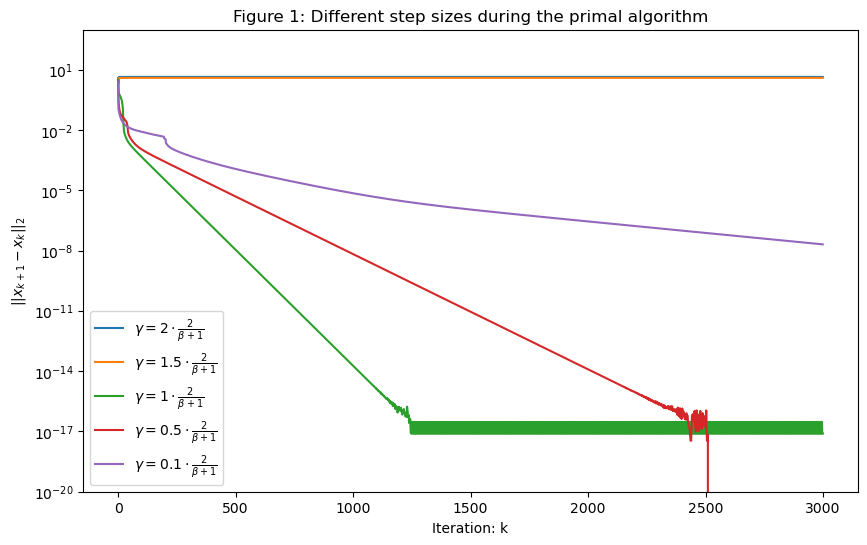

The optimal solution x* for gamma = 2 2/beta is:
 [-0.25374054  0.67293506 -0.99529736 -0.2089593   0.76782499  0.13177708
  0.40501415 -0.32337736  0.43907988 -0.24008597 -0.91819269 -0.22318412
 -0.84388126  0.28903844 -0.05834368 -0.21791253  0.01631368  0.72454148
  0.52482998  0.28689621]
The optimal value of the primal function is: 143.4254252053375
The optimal solution x* for gamma = 1.5 2/beta is:
 [-0.25374054  0.43537833 -0.8129171  -0.2089593   0.76782499  0.13177708
  0.40501415 -0.11044368  0.43907988 -0.24008597 -0.91819269 -0.22318412
 -0.53436931  0.28903844 -0.05834368 -0.00132163  0.01631368  0.72454148
  0.52482998  0.28689621]
The optimal value of the primal function is: 114.77596289761587
The optimal solution x* for gamma = 1 2/beta is:
 [-0.25374054  0.22842393  0.25765564 -0.2089593   0.14902594 -0.02685467
 -0.02776544  0.0413215   0.39778617  0.50334775  0.04773959  0.07163752
 -0.0167408  -0.39799663  0.02749792  0.18934824  0.01631368 -0.39400725
  0.52482998

In [14]:
def problem_data():
    """
    problem_data() generates the problem data variables Q, q, a and b
    
    :return: (Q,q,a,b)
    """
    rs = np.random.RandomState(np.random.MT19937(np.random.SeedSequence(1)))
    n = 20
    Q = rs.randn(n,n)
    Q = Q.T@Q
    q = rs.randn(n)
    a = -rs.rand(n)
    b = rs.rand(n)
    return Q, q, a, b, n

def solve_primal(Q, q, a, b, gamma, x_0, nbr_iterations):
    x_cur = x_0
    step_length = []
    x_vec = []
    for k in range(nbr_iterations):
        # Calculate the next x_k:
        intermediate_result = x_cur - gamma*grad_quad(x_cur, Q, q)
        x_next = prox_box(intermediate_result, a, b, gamma)

        # Save the step length:
        step_length.append(np.linalg.norm(x_next - x_cur, 2)) 
        x_vec.append(x_next)

        # Prepare for next iteration:
        x_cur = x_next

    return (x_cur, x_vec, step_length)

def evaluate_primal(Q, q, a, b, x_star):
    primal_value = quad(x_star, Q, q) + box(x_star, a, b)
    return primal_value

# Generate the problem data
(Q,q,a,b,n) = problem_data()

nbr_iterations = 3000
x_0 = np.random.randn(n) ## arbitrary x0

# Solve the primal problem for different values of gamma
x_stars = []
gamma_best = 2/(np.linalg.norm(Q, 2) + 1) ## Setting gamma to be less than 2/beta, using +1 in the denominator as a small increment

alphas = [2, 1.5, 1, 0.5, 0.1]

# Plotting the step length
plt.figure(figsize=(10, 6))
plt.title('Figure 1: Different step sizes during the primal algorithm')
plt.xlabel('Iteration: k')
plt.ylabel('$ || x_{k+1} - x_k ||_2 $')
plt.yscale('log')
plt.ylim(1e-20, 1e3)
for alpha in alphas:
    (x_star, x_results, step_length) = solve_primal(Q, q, a, b, alpha*gamma_best, x_0, nbr_iterations)    
    x_stars.append(x_star)    
    plt.plot(step_length, label=f"$\gamma = {alpha} \cdot \\frac{{2}}{{\\beta + 1}}$")
plt.legend()
plt.show()

for x_star, alpha in zip(x_stars, alphas):
    print('The optimal solution x* for gamma =', alpha, '2/beta is:\n', x_star)
    print('The optimal value of the primal function is:', quad(x_star, Q, q) + box(x_star, a, b))

__a)__ What seems to be the best choice of $\gamma$? 

__Solution:__ 

It seems as if the $\gamma$ close to, but less than, $2/\beta$ converges the fastest, and it achieves the same minimizer as if a smaller step size is used. Therefore it seems to be the best choice. 

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__b)__ Does the upper bound $\gamma < \frac{2}{\beta}$ seem reasonable?

__Solution:__ 

According to theory this seems valid, since the functions are ${\beta}$ smooth, and by analyzing Figure 1 above we find that the upper bound seems reasonable. This conclusion is motivated by the fact that Figure 1 clearly shows that with a $\gamma > \frac{2}{\beta}$ the function is not minimized (the optimal value that is found is ~143 as shown in the printouts below the figure). $\gamma$s below the threshold reach the desired minimizer, see Figure 1 once more, but the $\gamma$ closer to the threshold reaches the minimizer quicker as evident by reaching an insignificantly small step size earlier (compare slopes).

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

Test different initial points for the algorithm:

__c)__ Does this affect the point the algorithm converges to? 

__Solution:__ 

It does not seem to affect the final point of convergence, as we can see in Figure 2 and the printouts of $x^{\ast}$ below: 

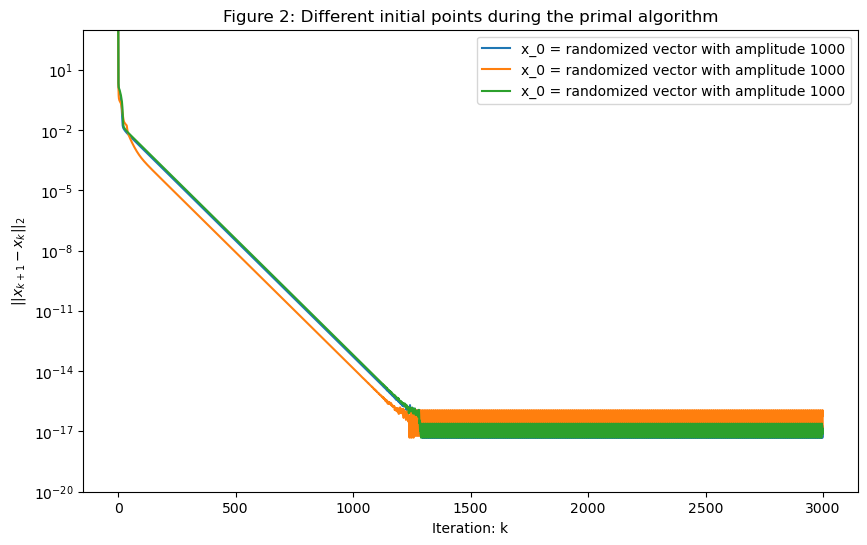

The optimal solution x* for x_0 =
 [-1353.5469675   1200.88366702  -459.3306571    -91.84945088
   902.76652115 -2275.10121891   -47.69206686 -2420.7917586
  1287.44964577 -1249.85551392  -769.2121868   -734.79468923
  -605.72608008   251.40368298 -1360.89240264 -1061.163832
  -754.78722635   467.79016999   204.03338082   847.30028295] 
is:
 [-0.25374054  0.22842393  0.25765564 -0.2089593   0.14902594 -0.02685467
 -0.02776544  0.0413215   0.39778617  0.50334775  0.04773959  0.07163752
 -0.0167408  -0.39799663  0.02749792  0.18934824  0.01631368 -0.39400725
  0.52482998  0.28689621]
The optimal value of the primal function is: -2.673542321908442 

The optimal solution x* for x_0 =
 [  664.55051329   -32.71655879  -788.02085167   919.90272563
   877.33693151 -1669.47332469  -932.03210505  1229.98022166
  1216.12990886   144.91881003  -215.1958165  -1188.77254197
 -1452.58484319   811.15891195  2111.47568476  2473.79122596
   815.74272972  -283.25274808   343.96415967   -83.45299901] 
is:

In [18]:
# Write your solution here
(Q,q,a,b,n) = problem_data()

nbr_iterations = 3000
gamma = 2/(np.linalg.norm(Q, 2) + 1) ## Setting gamma to be less than 2/beta, using +1 in the denominator as a small increment

# Solve the primal problem for different initial points x_0:
x_0s = [1000*np.random.randn(n) for _ in range(3)]

x_stars = []

plt.figure(figsize=(10, 6))
plt.title('Figure 2: Different initial points during the primal algorithm')
plt.xlabel('Iteration: k')
plt.ylabel('$ || x_{k+1} - x_k ||_2 $')
plt.yscale('log')
plt.ylim(1e-20, 1e3)
    
for idx, x_0 in enumerate(x_0s):
    (x_star, x_results, step_length) = solve_primal(Q, q, a, b, gamma, x_0, nbr_iterations)
    x_stars.append(x_star)    
    # Plotting the step length    
    plt.plot(step_length, label='x_0 = randomized vector with amplitude 1000')

plt.legend()
plt.show()

for x_star, x_0 in zip(x_stars, x_0s):
    print('The optimal solution x* for x_0 =\n', x_0, '\nis:\n', x_star)
    print('The optimal value of the primal function is:', evaluate_primal(Q, q, a, b, x_star), '\n')

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__d)__ Carefully motivate theoretically why/why not it affects the final point. _Hint:_ Look at the objective function in (2).

__Solution:__ 

Since we use the prox method on the indicator function in every step of the algorithm, this results in the algorithm to only find points inside the set S in every step. Since the objective function is composed of one strictly convex function and one convex function the global minimizer is unique, and therefore a unique minimizer exists which explains why we find the same final point $x^{\ast}$.

Furthermore $f$ is strongly convex, which when added to a convex function ($g$) results in a strongly convex optimizations problem with a unique solution. This further motivates the insignificance of the intial point. 

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__e)__ Does your final point $x^{\text{final}}$ satisfy the constraint $x^{\text{final}} \in S$?

__Solution:__ 

Yes, otherwise the evaluation of the final point over the objective function would be infinite. As we can see in the printouts below, and Figure 2, this is not the case. 

In [21]:
def is_point_in_S(a, b, x): 
    """
    is_point_in_S(a, b, x) checks if a point x is in the set S
    
    :param a: the left vector defining the box constraint
    :param b: the right vector defining the box constraint
    :param x: the point to check
    :return: True if x is in S, False otherwise
    """
    return np.all(a <= x) and np.all(x <= b)

print("a:", a)
print("b:", b)
print('The point x = 0 is in the set S:', is_point_in_S(a, b, np.zeros(n)))
for x_star in x_stars:
    print('The point x* is in the set S:', is_point_in_S(a, b, x_star))
    print(x_star)

a: [-0.25374054 -0.38454343 -0.99529736 -0.2089593  -0.14574171 -0.39089
 -0.26386847 -0.43276486 -0.04527413 -0.24008597 -0.91819269 -0.22318412
 -0.84388126 -0.97845518 -0.05834368 -0.56512668 -0.11978074 -0.85050739
 -0.21177808 -0.23111829]
b: [0.93788099 0.91352836 0.86516271 0.10348766 0.76782499 0.13177708
 0.40501415 0.60899198 0.43907988 0.55382616 0.31341529 0.19740324
 0.94014941 0.28903844 0.38821612 0.5273254  0.01631368 0.72454148
 0.52482998 0.28689621]
The point x = 0 is in the set S: True
The point x* is in the set S: True
[-0.25374054  0.22842393  0.25765564 -0.2089593   0.14902594 -0.02685467
 -0.02776544  0.0413215   0.39778617  0.50334775  0.04773959  0.07163752
 -0.0167408  -0.39799663  0.02749792  0.18934824  0.01631368 -0.39400725
  0.52482998  0.28689621]
The point x* is in the set S: True
[-0.25374054  0.22842393  0.25765564 -0.2089593   0.14902594 -0.02685467
 -0.02776544  0.0413215   0.39778617  0.50334775  0.04773959  0.07163752
 -0.0167408  -0.39799663  0.

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__f)__ What about the iterates, do they always satisfy the constraint, $x^k \in S$? Why/why not?

__Solution:__ 

Since the prox method is used in every step of the algorithm, all $x^k \in S$ except the initial point $x_0$ which is chosen arbitrarily. 

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task 10:

Solve the dual problem. 

__a)__ Similar to the previous task, find/verify the upper bound on the step-size and find a good step-size choice.

__Solution:__ 

_Fill in your solution here!_

C:\Users\cstuf\AppData\Local\Temp\ipykernel_4784\1338075049.py:7: RuntimeWarning: invalid value encountered in subtract
  intermediate_result = mu_cur - gamma*grad_quadconj(mu_cur, Q, q)


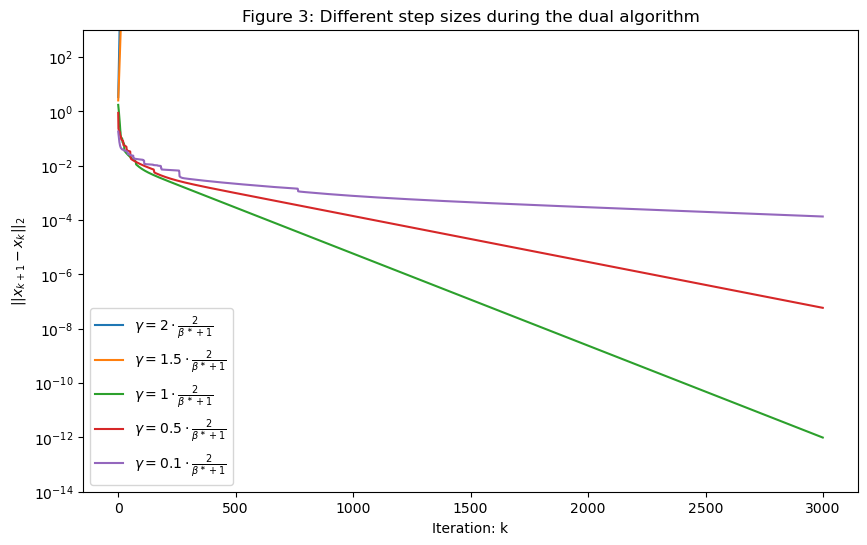

In [57]:
def solve_dual(Q, q, a, b, gamma, mu_0, nbr_iterations):
    mu_cur = mu_0
    step_length = []
    mu_vec = []
    for k in range(nbr_iterations):
        # Calculate the next mu_k:
        intermediate_result = mu_cur - gamma*grad_quadconj(mu_cur, Q, q)
        mu_next = -prox_boxconj(-intermediate_result, a, b, gamma)

        # Save the step length:
        step_length.append(np.linalg.norm(mu_next - mu_cur, 2)) 
        mu_vec.append(mu_next)

        # Prepare for next iteration:
        mu_cur = mu_next

    return (mu_cur, mu_vec, step_length)

def evaluate_dual(Q, q, a, b, x_star):
    dual_value = quadconj(x_star, Q, q) + boxconj(-x_star, a, b)
    return dual_value

# Generate the problem data
(Q,q,a,b,n) = problem_data()

nbr_iterations = 3000
mu_0 = np.random.randn(n) ## arbitrary x0

# Solve the primal problem for different values of gamma
gamma_best = 2/(np.linalg.norm(np.linalg.inv(Q)) + 1) ## Setting gamma to be less than 2/beta*, using +1 in the denominator as a small increment
alphas = [2, 1.5, 1, 0.5, 0.1]
mu_stars = []

# Plotting the step length
plt.figure(figsize=(10, 6))
plt.title('Figure 3: Different step sizes during the dual algorithm')
plt.xlabel('Iteration: k')
plt.ylabel('$ || x_{k+1} - x_k ||_2 $')
plt.yscale('log')
plt.ylim(1e-14, 1e3)
for alpha in alphas:
    (mu_star, mu_result, step_length) = solve_dual(Q, q, a, b, alpha*gamma_best, mu_0, nbr_iterations)
    mu_stars.append(mu_star)    
    plt.plot(step_length, label=f"$\gamma =  {alpha} \cdot \\frac{{2}}{{\\beta^\\ast + 1}}$")
plt.legend()
plt.show()

From the plots in Figure 3 we can verify that the chosen step size close to, but less than, 2/$\beta$* is a good choice and since it achieves fast and reliable convergence to the optimal solution compared to both smaller and larger step sizes (see Figure 3 above).   

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

Let $x^{\text{final}}$ be the final points from Task 9 and $\mu^{\text{final}}$ the final point for the dual problem. Let $\hat{x}^{\text{final}}$ final primal points extracted from the final dual point $\mu^{\text{final}}$ using the expression from Task 7:

__b)__ Are $x^{\text{final}}$ and $\hat{x}^{\text{final}}$ the same?

__Solution:__ 

As we can see below, $x^{\text{final}}$ and $\hat{x}^{\text{final}}$ are almost identical, indicating that the dual and primal algorithms have been executed correctly. 

In [27]:
# Write your solution here
best_mu_star = mu_stars[2]

print('\nThe optimal solution x* for gamma =', gamma_best, 'is:\n', best_mu_star)
dual_value = evaluate_dual(Q, q, a, b, best_mu_star)
print('The optimal value of the dual function is:', dual_value)

primal_x_star = dual_to_primal(best_mu_star, Q, q, a, b)
print("\nThis corresponds to the primal x_hat*:\n", primal_x_star)

print("\nThe optimal solution x* from the primal algorithm was:\n", x_stars[0])
print("The optimal value of the primal function is:", evaluate_primal(Q, q, a, b, x_stars[0]))


The optimal solution x* for gamma = 0.11845848580408738 is:
 [ 1.17512072 -0.         -0.          1.19820935 -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.59746159 -0.
 -1.57000462 -0.88243539]
The optimal value of the dual function is: 2.6735423219084407

This corresponds to the primal x_hat*:
 [-0.25374054  0.22842393  0.25765564 -0.2089593   0.14902594 -0.02685467
 -0.02776544  0.0413215   0.39778617  0.50334775  0.04773959  0.07163752
 -0.0167408  -0.39799663  0.02749792  0.18934824  0.01631368 -0.39400725
  0.52482998  0.28689621]

The optimal solution x* from the primal algorithm was:
 [-0.25374054  0.22842393  0.25765564 -0.2089593   0.14902594 -0.02685467
 -0.02776544  0.0413215   0.39778617  0.50334775  0.04773959  0.07163752
 -0.0167408  -0.39799663  0.02749792  0.18934824  0.01631368 -0.39400725
  0.52482998  0.28689621]
The optimal value of the primal function is: -2.673542321908442


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__c)__ Is $\hat{x}^{\text{final}}$ in the box $S$?

__Solution:__ 

As we can see below, $\hat{x}^{\text{final}}$ is not in the box $S$. This seems logical since the solution of the primal problem will approach the optimal solution from "the opposite side" when using the dual algorithm compared to the primal algorithm.

In [29]:
print("The x_hat* from the dual algorithm is in the set S:", is_point_in_S(a, b, primal_x_star))

The x_hat* from the dual algorithm is in the set S: False


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__d)__ Let $\mu^k$ be the iterates of the dual method, using the expression from Task 7, extract the primal iterates $\hat{x}^k$ from $\mu^k$. Does $\hat{x}^k$ always satisfy the constraint $\hat{x}^k \in S$?

__Solution:__ 

No, it never satisfies this constraint, except when the retrieved starting point happens to be in $S$. This is due to the prox of the conjugate function always returns $\mu$s with primal points outside of $S$.

In [31]:
(mu_star, mu_iterates, step_length) = solve_dual(Q, q, a, b, gamma_best, mu_0, nbr_iterations)

x_iterates = [dual_to_primal(mu, Q, q, a, b) for mu in mu_iterates]

# Check if any of the x_iterates are in the set S: 
for idx, x in enumerate(x_iterates):
    any_x_in_S = False
    if is_point_in_S(a, b, x):
        print(f"x_{idx} is in S:")
        any_x_in_S = True

print("Any x_k in S:", any_x_in_S)

Any x_k in S: False


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__e)__ How do the function values $f\left(\hat{x}^k\right)$ develop over the iterations?

__Solution:__ 

The function values $f(\hat{x}^k)$ converge to the optimal solution to the primal problem quickly compared to the primal algorithm.  

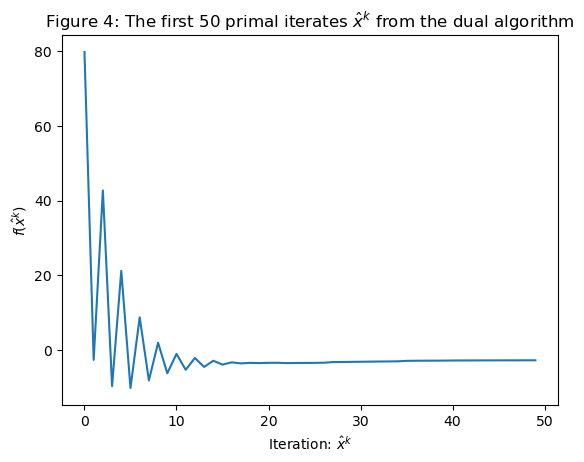

In [33]:
primal_f_values = [quad(x, Q, q) for x in x_iterates]

plt.figure()
plt.title('Figure 4: The first 50 primal iterates $\hat{x}^k$ from the dual algorithm')
plt.plot(primal_f_values[0:50])
plt.xlabel('Iteration: $\hat{x}^k$')
plt.ylabel('$f(\hat{x}^k)$')
plt.show()

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__f)__ What about $f\left(\hat{x}^k\right)+\iota_{S}\left(\hat{x}^k\right)$?

__Solution:__ 

Since all iterates $\hat{x}^k$ are outside of $S$, the function $\iota_{S}(\hat{x}^k)$ will always evaluate to infinity, and therefore the sum will always evaluate to infinity. 

In [35]:
primal_function_values = [evaluate_primal(Q, q, a, b, x) for x in x_iterates]
print(min(primal_function_values))

inf
